# Advanced Machine Learning

### Assigment #7 - Time Series

**Team:**
    João Raimundo (57454), Rui Roque (57588)

### 0.1 Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import matplotlib.pyplot as plt


from datetime import datetime

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model



2022-05-08 02:39:44.310256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-08 02:39:44.310281: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 0.1 Models Implementation

### 0.2 LSTM Model (Long short-term memory):

In [2]:
def lstm(X_train, y_train, X_test, y_test, epochs, noise = False, noise_value = 0.05):
    if(noise == False):
        lstm_model = Sequential([
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12),
        layers.Dropout(0.2),
        layers.Dense(1)
        ])
    else:
        lstm_model = Sequential([
        layers.GaussianNoise(noise_value),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12),
        layers.Dropout(0.2),
        layers.Dense(1)
        ])    


    # compile
    lstm_model.compile(optimizer = 'adam', loss = keras.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])

    print("LSTM Model contructed with 3 hidden layers of 12 neurons:\n")

    # Fitting the RNN to the Training set
    print("Currently fitting the model with the training set with", epochs, " epochs:")
    history_lstm = lstm_model.fit(X_train,y_train,epochs = epochs)

    print("\n")

    # plot loss plot
    plt.plot(history_lstm.history['loss'], label="loss")
    plt.legend(loc="upper right")
    plt.title("Loss Plot")
    plt.show()

    # inferring MSE % RMSE
    predictions = lstm_model.predict(X_test)
    test_score = mean_squared_error(y_test, predictions)
    print('LSTM Model Test MSE: %.3f' % test_score)
    print('LSTM Model Test RMSE: %.3f' % sqrt(test_score))

    # plot predictions and expected results
    fig = plt.figure(figsize=(40,10))
    plt.plot(y_train,  label="Train")
    plt.plot([None for i in y_train] + [x for x in y_test], label="Test")
    plt.plot([None for i in y_train] + [x for x in predictions], label="Predicted")
    plt.legend(loc="upper left", prop= {"size": 15}) 
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("Train, Test and Predicted Results")
    plt.show()


### 0.3 FTLFN Model:

In [3]:
def ftlfn(X_train, y_train, X_test, y_test, epochs, noise = False, noise_value = 0.05):

    train_performance, test_performance = list(), list()
    
    if(noise == False):
        ftlfn_model = Sequential([
        layers.Dense(12, activation='relu'),
        layers.Dense(1)
        ])
    else:
        ftlfn_model = Sequential([
        layers.GaussianNoise(noise_value),
        layers.Dense(12, activation='relu'),
        layers.Dense(1)
        ])


    # compile
    ftlfn_model.compile(optimizer = 'adam', loss = keras.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])

    print("LSTM Model contructed with 3 hidden layers of 12 neurons:\n")

    # Fitting the RNN to the Training set
    print("Currently fitting the model with the training set with", epochs, " epochs:")
    for i in range(epochs):
        history_ftlfn = ftlfn_model.fit(X_train,y_train,epochs = 1)
        
        train_performance.append(ftlfn_model.evaluate(X_train, y_train, verbose=0)[0])
        test_performance.append(ftlfn_model.evaluate(X_test_1, y_test_1, verbose = 0)[0])

    performance = pd.DataFrame()
    performance["train_mse"], performance["test_mse"] = train_performance, test_performance

    return performance
    

In [4]:
def run_ftlfn(X_train, y_train, X_test, y_test, repeats, epochs, noise = False, noise_value = 0.05):

    for i in range(repeats):
        history = ftlfn(X_train, y_train, X_test, y_test, epochs)
        plt.plot(history['train_mse'], color='blue')
        plt.plot(history['test_mse'], color='orange')
        print('%d) TrainMSE=%f, TestMSE=%f' % (i, history['train_mse'].iloc[-1], history['test_mse'].iloc[-1]))


    
 
    
    

## 1.0 Problem 1

Creation of the time series for problem 1:

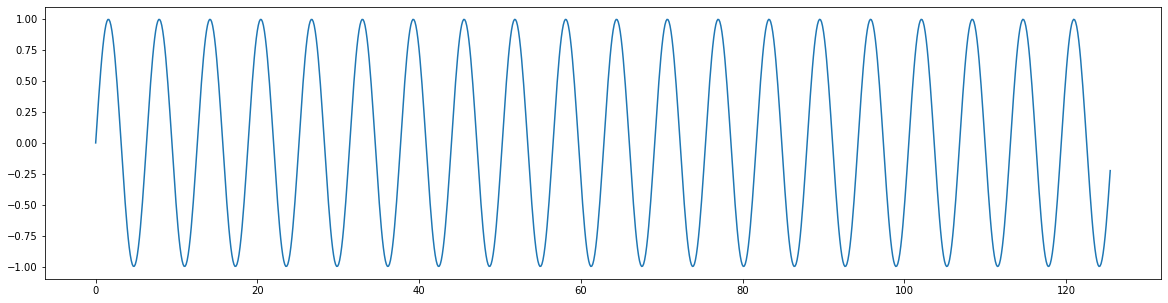

In [5]:
lag = 12
points = np.linspace(0, 2*math.pi*100, 50*100)
sin = np.sin(points)

fig = plt.figure(figsize=(20,5))


# plot the function - first 
plt.plot(points[0:999], sin[0:999])
plt.show()

Adding a filter (time delay) of 12 to the time series:

In [6]:
X = []
y = []

for i in range(lag, 4999):
   X.append(sin[i-lag:i])
   y.append(sin[i])

X = np.expand_dims(X, axis = 2)
y = np.array(y)

Split Data:

- Training with the first 2400 data points and testing with data points 2401 to 2501 (First split);
  
- Training from data points 2401 to 4900 and testing with data points 4901 to the last data point (Second split).

In [7]:
X_train_1 = X[:2400]
y_train_1 = y[:2400]
X_test_1  = X[2401:2501]
y_test_1  = y[2401:2501]

X_train_2 = X[2401:4900]
y_train_2 = y[2401:4900]
X_test_2  = X[4901:-1]
y_test_2  = y[4901:-1]

print("Shape of sets: \n")
print("--> First Train and Test sets:")
print("X_train_1: ", X_train_1.shape)
print("y_train_1: ", y_train_1.shape)
print("X_test_1: ", X_test_1.shape)
print("y_test_1: ", y_test_1.shape,"\n")

print("--> Second Train and Test sets:")
print("X_train_2: ", X_train_2.shape)
print("y_train_2: ", y_train_2.shape)
print("X_test_2: ", X_test_2.shape)
print("y_test_2: ", y_test_2.shape)

Shape of sets: 

--> First Train and Test sets:
X_train_1:  (2400, 12, 1)
y_train_1:  (2400,)
X_test_1:  (100, 12, 1)
y_test_1:  (100,) 

--> Second Train and Test sets:
X_train_2:  (2499, 12, 1)
y_train_2:  (2499,)
X_test_2:  (85, 12, 1)
y_test_2:  (85,)


 ### 1.1 I) Evolution of LSTM and FTLFN learning process without noise

LSTM Model using the first split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10


2022-05-08 02:39:46.774094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-08 02:39:46.774125: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-08 02:39:46.774144: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Redck): /proc/driver/nvidia/version does not exist
2022-05-08 02:39:46.774854: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


75/75 [==============================] - 5s 10ms/step - loss: 0.3703 - mean_absolute_error: 0.5459
Epoch 2/10
75/75 [==============================] - 1s 11ms/step - loss: 0.1288 - mean_absolute_error: 0.2947
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0421 - mean_absolute_error: 0.1641
Epoch 4/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0334 - mean_absolute_error: 0.1463
Epoch 5/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.1332
Epoch 6/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0257 - mean_absolute_error: 0.1262
Epoch 7/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.1236
Epoch 8/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.1190
Epoch 9/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0211 - mean_absolute_error: 0.1146
Epoch 10/10
75/75 [=========

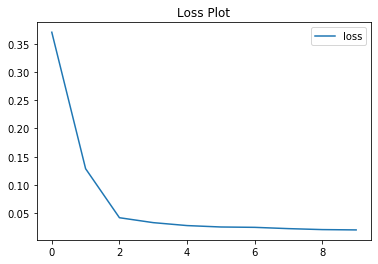

LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.037
plot of predictions and expected results


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


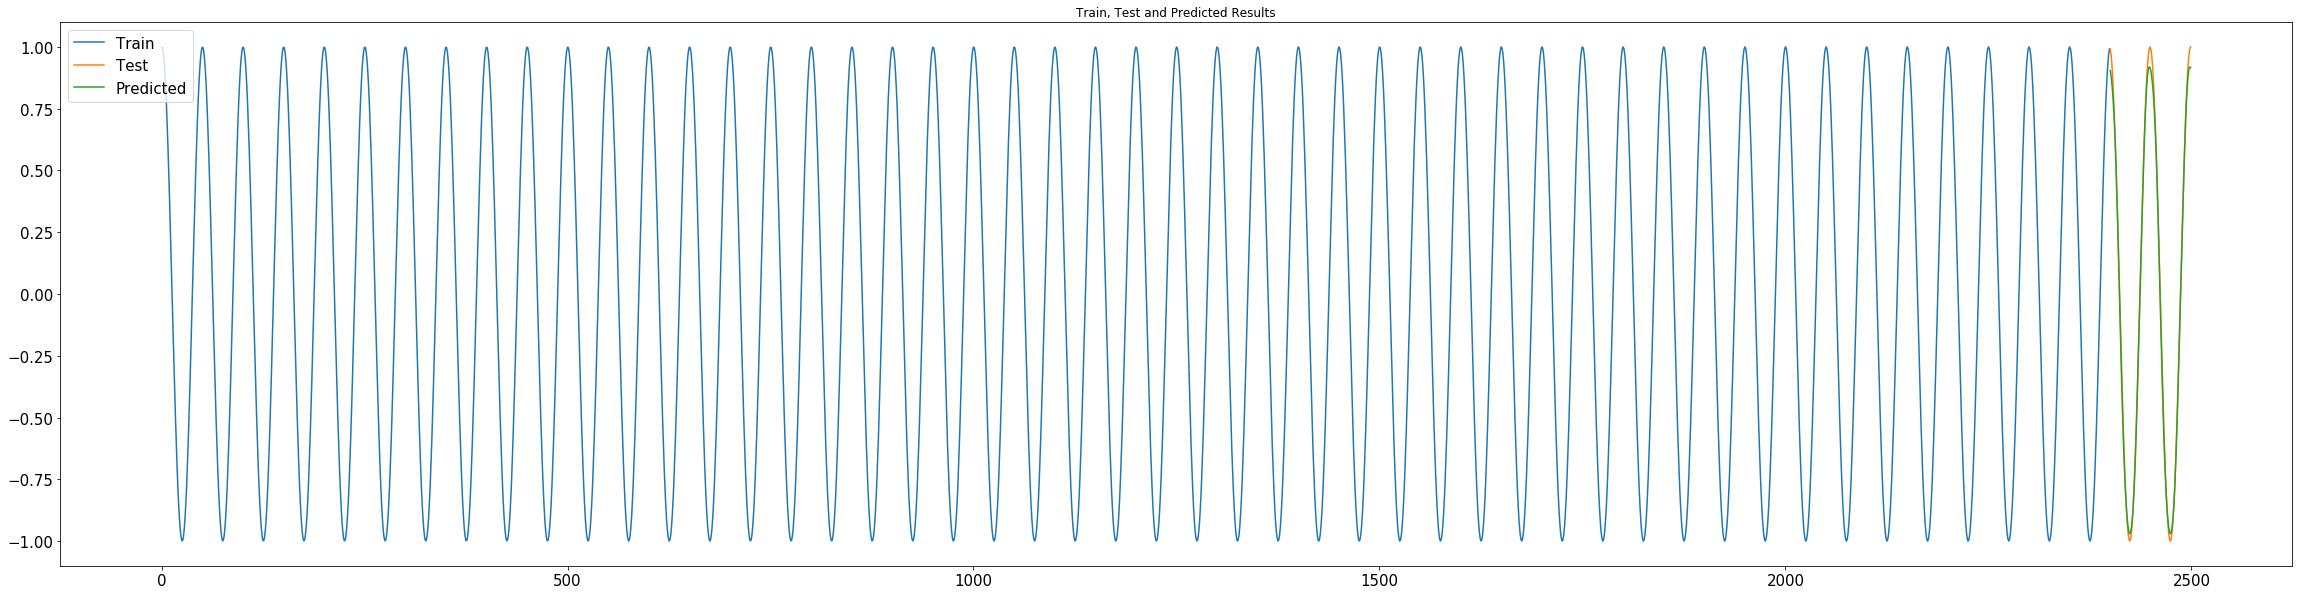

In [8]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 10)

LSTM Model using the second split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10
79/79 [==============================] - 5s 12ms/step - loss: 0.3982 - mean_absolute_error: 0.5665
Epoch 2/10
79/79 [==============================] - 1s 12ms/step - loss: 0.1608 - mean_absolute_error: 0.3363
Epoch 3/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0421 - mean_absolute_error: 0.1610
Epoch 4/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0326 - mean_absolute_error: 0.1412
Epoch 5/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0295 - mean_absolute_error: 0.1352
Epoch 6/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0265 - mean_absolute_error: 0.1272
Epoch 7/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0248 - mean_absolute_error: 0.1223
Epoch 8/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0242 - mean_absolute_error: 0

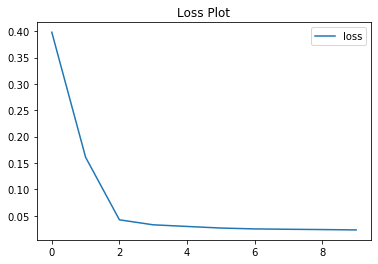

LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.027
plot of predictions and expected results


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


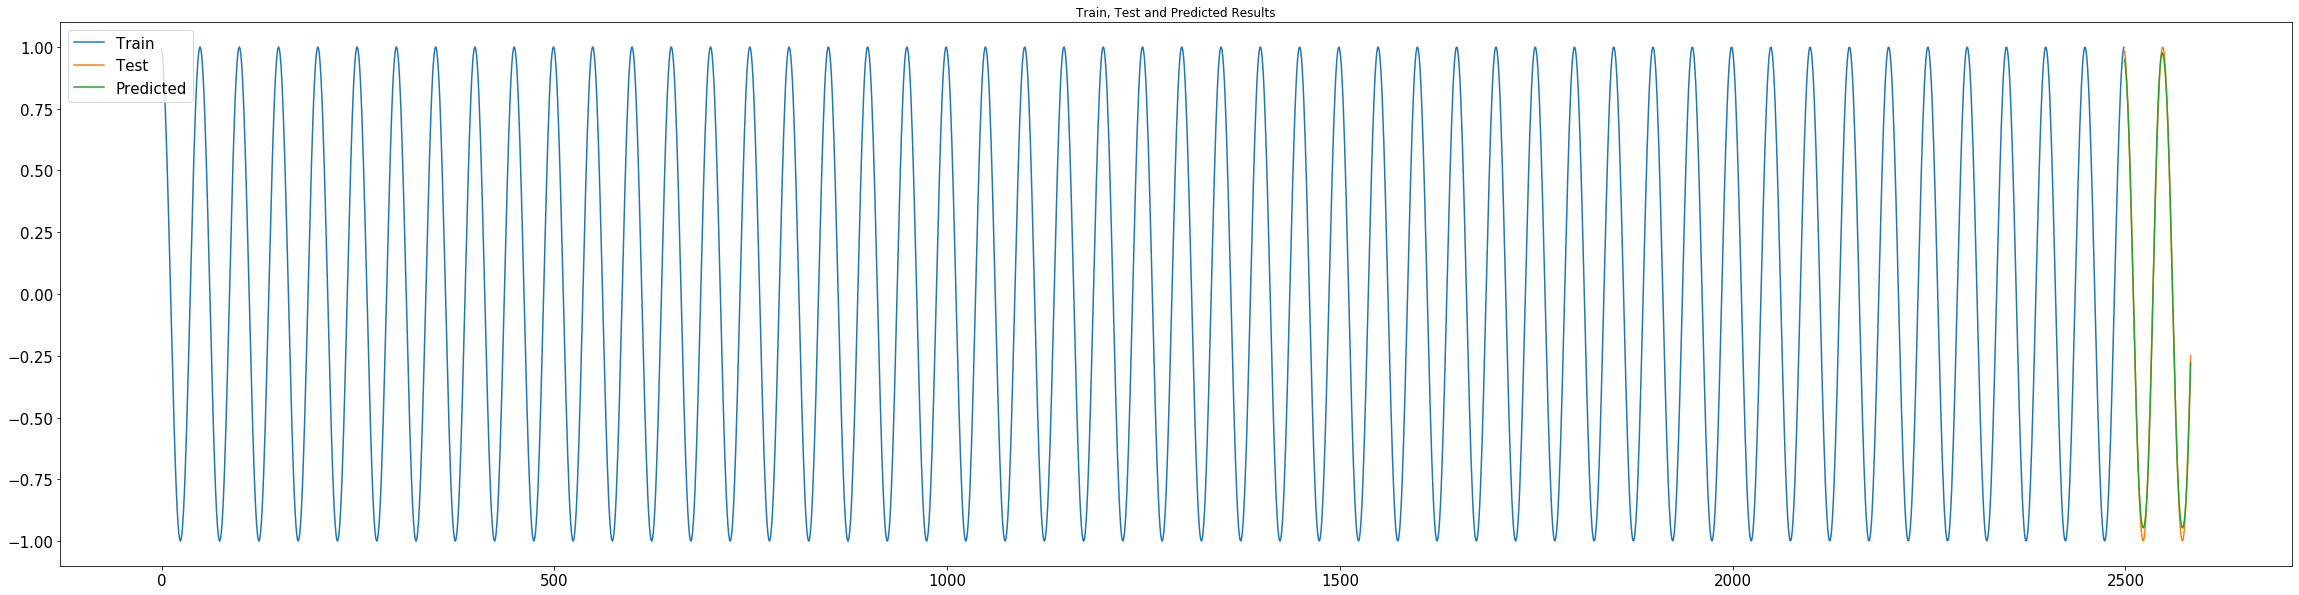

In [9]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, 10)

FTLFN Model using the first split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 866us/step - loss: 0.5008 - mean_absolute_error: 0.6370
0) TrainMSE=0.499360, TestMSE=0.498253
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 868us/step - loss: 0.5006 - mean_absolute_error: 0.6369
1) TrainMSE=0.497422, TestMSE=0.496013
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 917us/step - loss: 0.5004 - mean_absolute_error: 0.6368
2) TrainMSE=0.499117, TestMSE=0.498181
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 954us/step - loss: 0.5005 - mean_ab

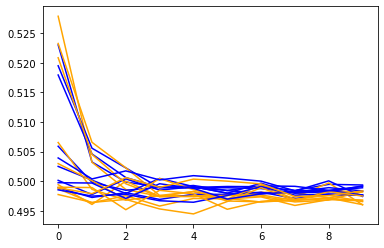

In [10]:
run_ftlfn(X_train_1, y_train_1, X_test_1, y_test_1, 10, 10)

FTLFN Model using the second split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.5005 - mean_absolute_error: 0.6366
0) TrainMSE=0.497439, TestMSE=0.497076
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.5005 - mean_absolute_error: 0.6366
1) TrainMSE=0.498211, TestMSE=0.497136
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.5002 - mean_absolute_error: 0.6367
2) TrainMSE=0.497761, TestMSE=0.497513
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.5002 - mean_absolute_e

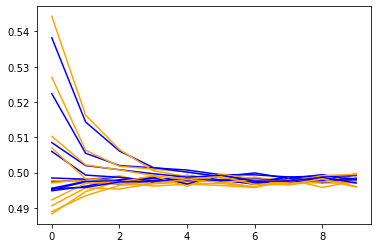

In [11]:
run_ftlfn(X_train_2, y_train_2, X_test_2, y_test_2, 10, 10)

Performance:

### 1.2 II) Evolution of LSTM and FTLFN learning process with noise

LSTM Model with noise using the first split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10
75/75 [==============================] - 5s 9ms/step - loss: 0.3526 - mean_absolute_error: 0.5342
Epoch 2/10
75/75 [==============================] - 1s 8ms/step - loss: 0.1075 - mean_absolute_error: 0.2670
Epoch 3/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.1584
Epoch 4/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0318 - mean_absolute_error: 0.1408
Epoch 5/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0280 - mean_absolute_error: 0.1319
Epoch 6/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.1256
Epoch 7/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0252 - mean_absolute_error: 0.1250
Epoch 8/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.1192
Ep

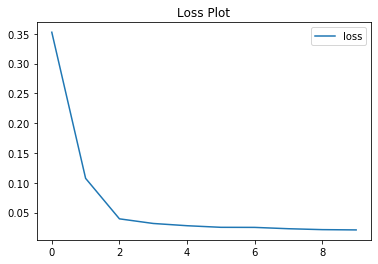

LSTM Model Test MSE: 0.002
LSTM Model Test RMSE: 0.039
plot of predictions and expected results


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


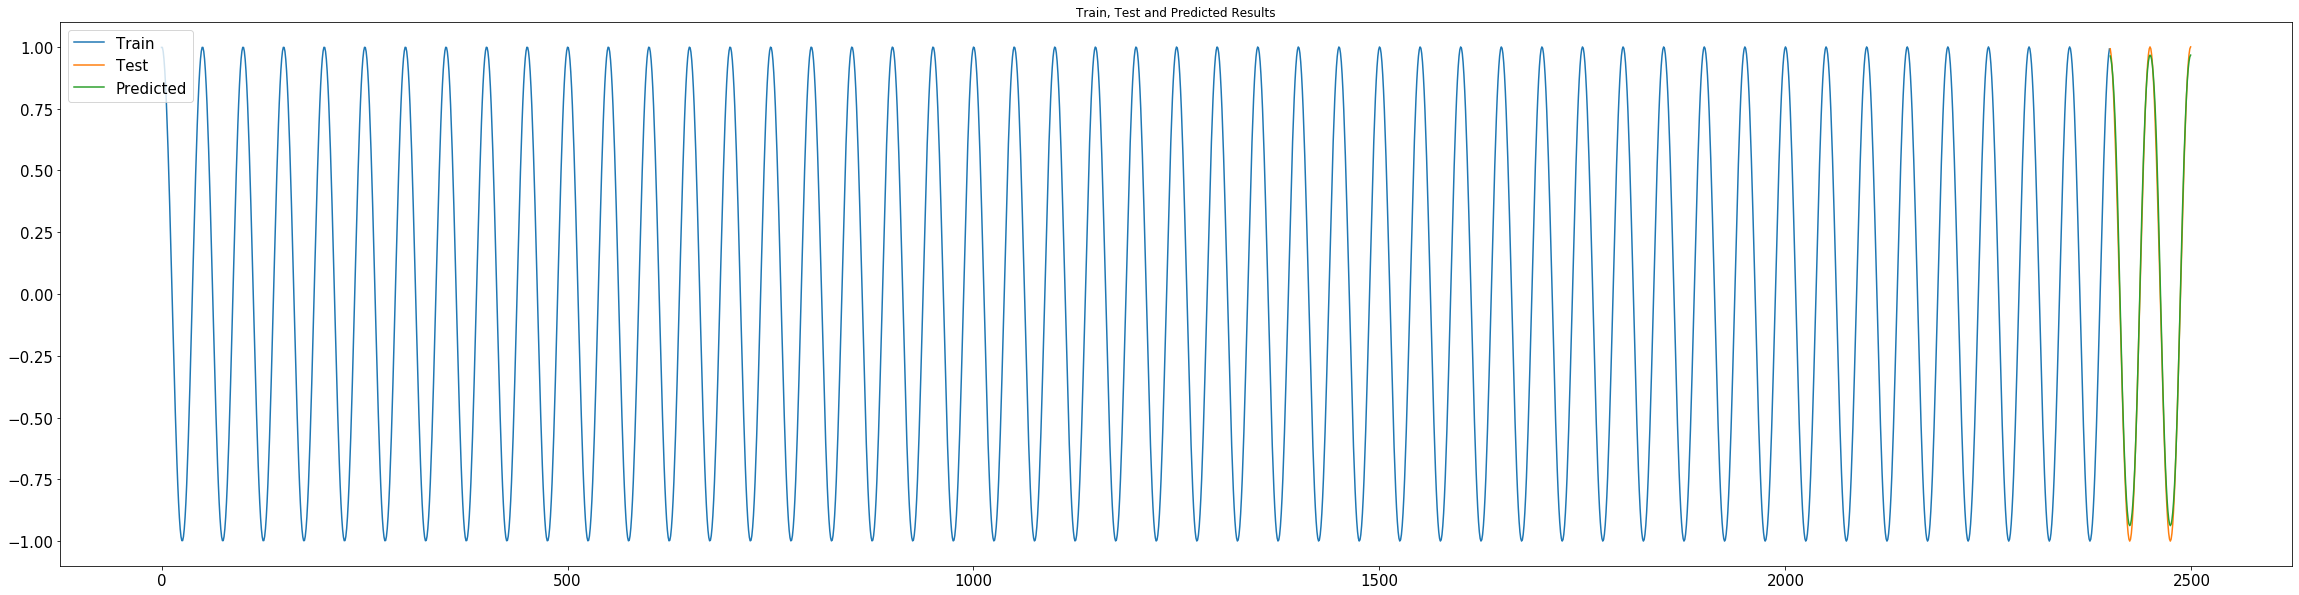

In [12]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 10, True)

LSTM Model with noise using the second split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10
79/79 [==============================] - 6s 12ms/step - loss: 0.3566 - mean_absolute_error: 0.5346
Epoch 2/10
79/79 [==============================] - 1s 11ms/step - loss: 0.1042 - mean_absolute_error: 0.2635
Epoch 3/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0447 - mean_absolute_error: 0.1670
Epoch 4/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0351 - mean_absolute_error: 0.1485
Epoch 5/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0306 - mean_absolute_error: 0.1385
Epoch 6/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0275 - mean_absolute_error: 0.1287
Epoch 7/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0245 - mean_absolute_error: 0.1231
Epoch 8/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0233 - mean_absolute_error: 0

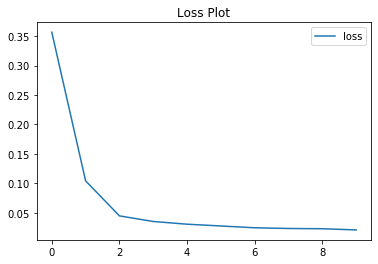

LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.024
plot of predictions and expected results


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


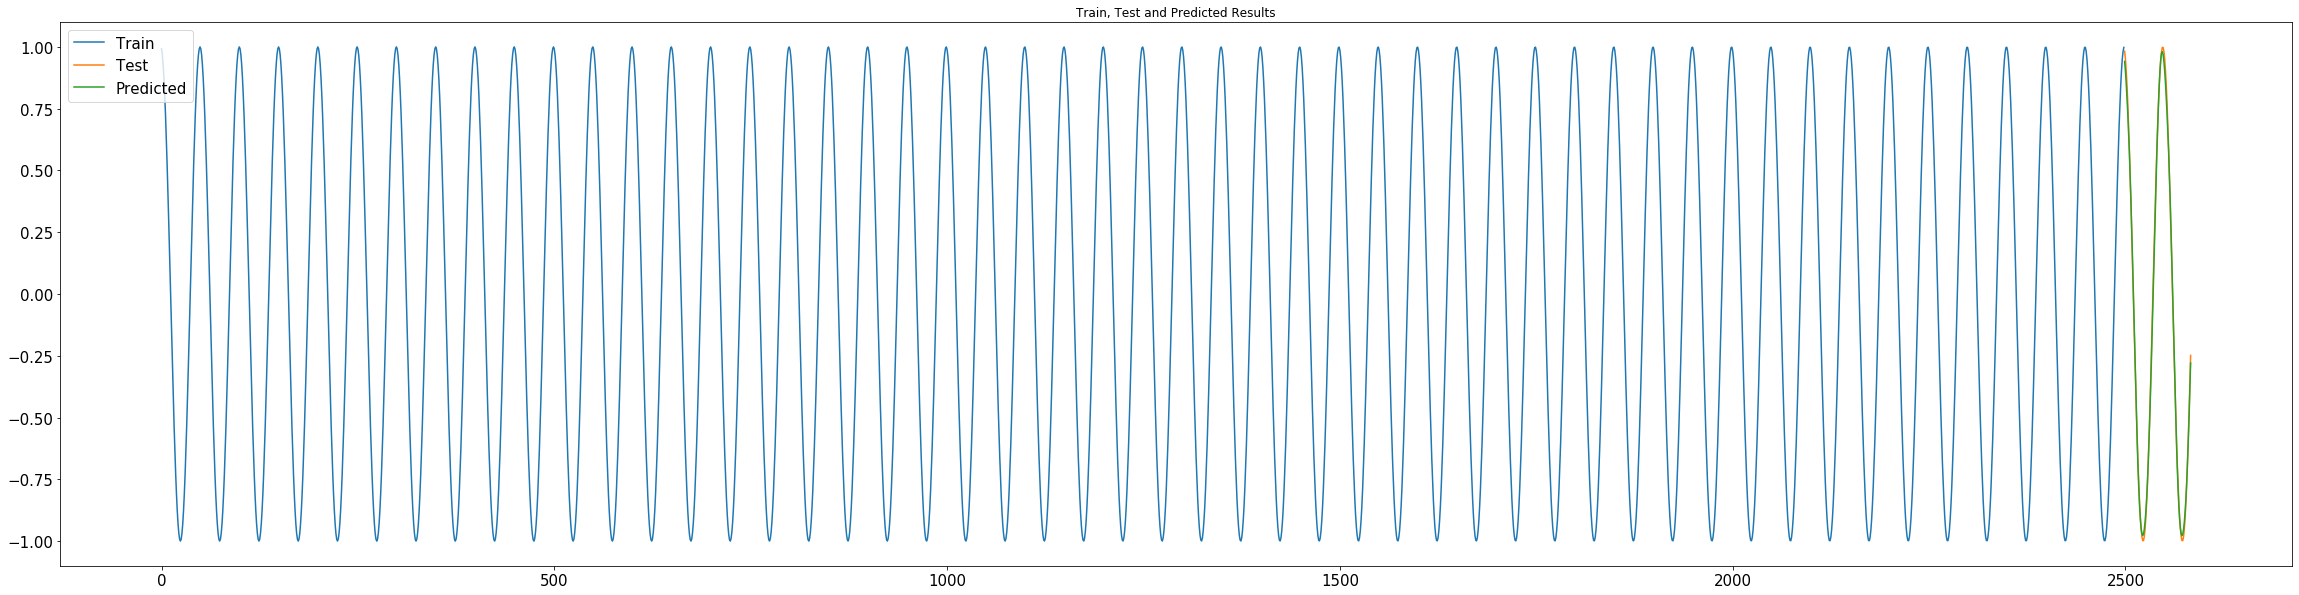

In [13]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, 10, True)

FTLFN Model with noise using the first split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 949us/step - loss: 0.5006 - mean_absolute_error: 0.6368
0) TrainMSE=0.496549, TestMSE=0.494924
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 963us/step - loss: 0.5004 - mean_absolute_error: 0.6369
1) TrainMSE=0.497057, TestMSE=0.496064
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 966us/step - loss: 0.5005 - mean_absolute_error: 0.6368
2) TrainMSE=0.497653, TestMSE=0.496947
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
75/75 [==============================] - 0s 914us/step - loss: 0.5007 - mean_ab

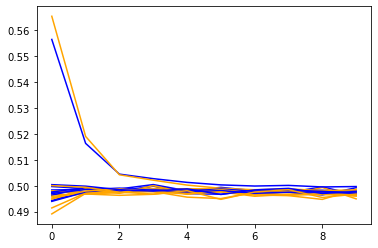

In [14]:
run_ftlfn(X_train_1, y_train_1, X_test_1, y_test_1, 10, 10, True)

FTLFN Model with noise using the second split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.5004 - mean_absolute_error: 0.6367
0) TrainMSE=0.499071, TestMSE=0.499358
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.5005 - mean_absolute_error: 0.6367
1) TrainMSE=0.498069, TestMSE=0.497088
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.5002 - mean_absolute_error: 0.6365
2) TrainMSE=0.499601, TestMSE=0.499582
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
79/79 [==============================] - 0s 2ms/step - loss: 0.5009 - mean_absolute_e

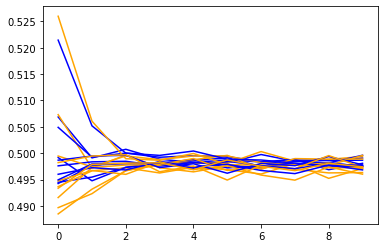

In [15]:
run_ftlfn(X_train_2, y_train_2, X_test_2, y_test_2, 10, 10, True)

Performance:

## 2.0 Problem 2

Creation of a time series for problem 2:

In [16]:
data = [5,6,3]

for i in range(4997):
    out = (0.6*data[i+2]) + (-0.54*data[i+1]) + (-0.44*data[i]) #+ 0.01 (U)
    data.append(out)

print(len(data))

5000


Adding a filter (time delay) of 12 to the time series:

In [17]:
X = []
y = []

for i in range(lag, 4999):
   X.append(data[i-lag:i])
   y.append(data[i])

X = np.expand_dims(X, axis = 2)
y = np.array(y)

Split Data:

- Training with the first 2400 data points and testing with data points 2401 to 2501 (First split);
  
- Training from data points 2401 to 4900 and testing with data points 4901 to the last data point (Second split).

In [18]:
X_train_1 = X[:2400]
y_train_1 = y[:2400]
X_test_1  = X[2401:2501]
y_test_1  = y[2401:2501]

X_train_2 = X[2401:4900]
y_train_2 = y[2401:4900]
X_test_2  = X[4901:-1]
y_test_2  = y[4901:-1]

### 2.1 Training the models

LSTM Model using the first split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
Epoch 1/50
75/75 [==============================] - 5s 8ms/step - loss: 5.6766 - mean_absolute_error: 1.9233
Epoch 2/50
75/75 [==============================] - 1s 8ms/step - loss: 3.5134 - mean_absolute_error: 1.4655
Epoch 3/50
75/75 [==============================] - 1s 8ms/step - loss: 1.5508 - mean_absolute_error: 0.9470
Epoch 4/50
75/75 [==============================] - 1s 12ms/step - loss: 1.2875 - mean_absolute_error: 0.8578
Epoch 5/50
75/75 [==============================] - 1s 11ms/step - loss: 1.0869 - mean_absolute_error: 0.7883
Epoch 6/50
75/75 [==============================] - 1s 9ms/step - loss: 1.0112 - mean_absolute_error: 0.7447
Epoch 7/50
75/75 [==============================] - 1s 8ms/step - loss: 0.9207 - mean_absolute_error: 0.7212
Epoch 8/50
75/75 [==============================] - 1s 9ms/step - loss: 0.7928 - mean_absolute_error: 0.6621


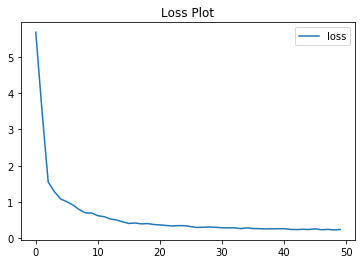

LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.033
plot of predictions and expected results


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


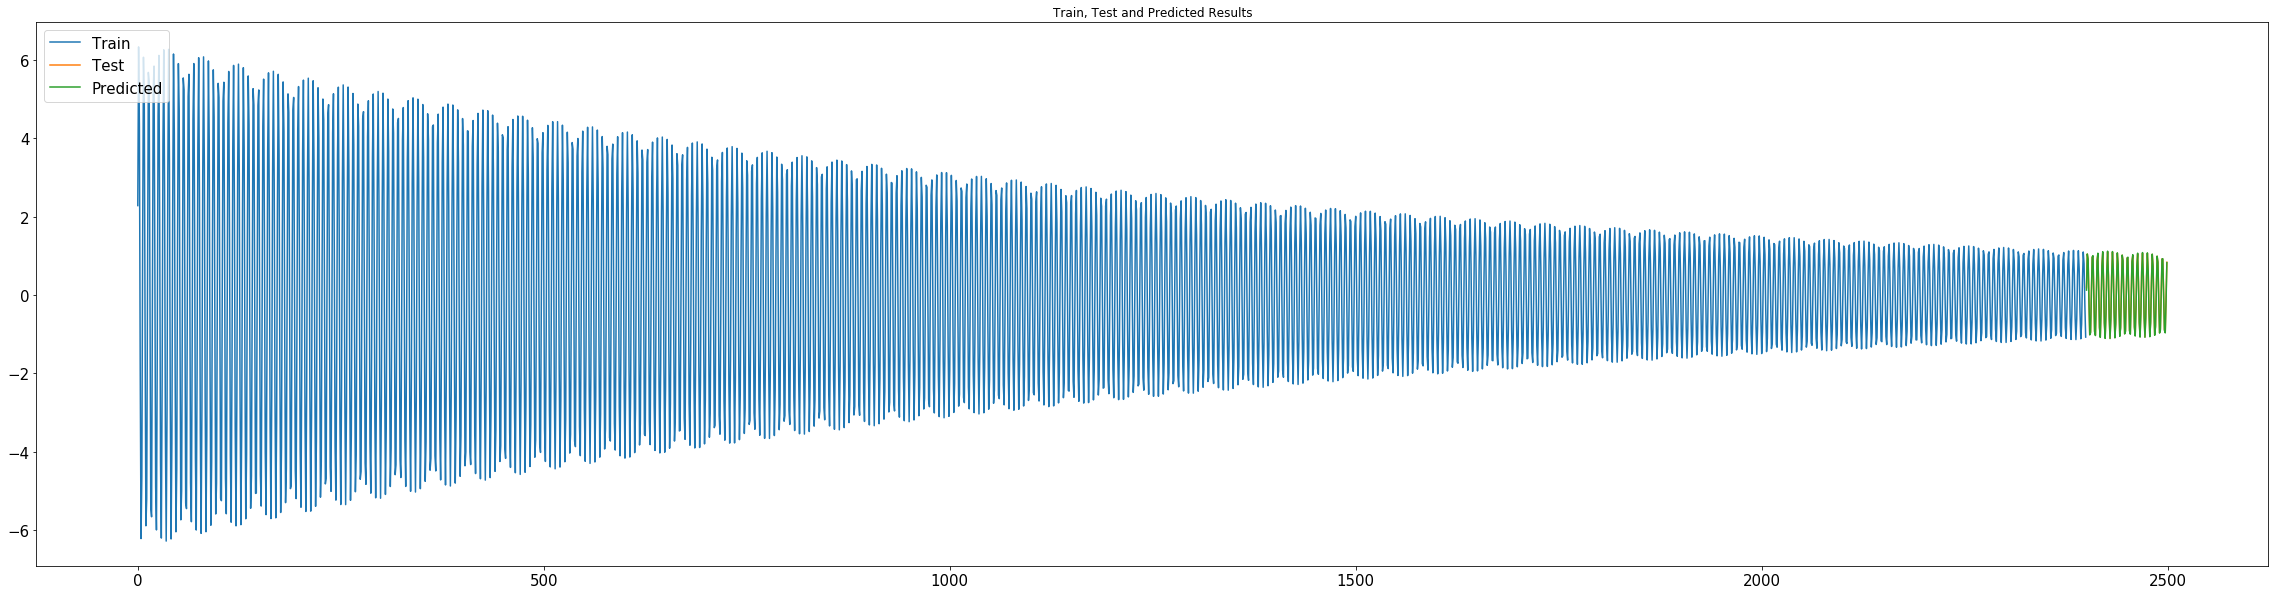

In [19]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 50, True, 0.01)

LSTM Model using the second split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
Epoch 1/50
79/79 [==============================] - 6s 14ms/step - loss: 0.1641 - mean_absolute_error: 0.3246
Epoch 2/50
79/79 [==============================] - 1s 13ms/step - loss: 0.0977 - mean_absolute_error: 0.2431
Epoch 3/50
79/79 [==============================] - 1s 13ms/step - loss: 0.0501 - mean_absolute_error: 0.1655
Epoch 4/50
79/79 [==============================] - 1s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.1466
Epoch 5/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0321 - mean_absolute_error: 0.1337
Epoch 6/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0279 - mean_absolute_error: 0.1242
Epoch 7/50
79/79 [==============================] - 1s 13ms/step - loss: 0.0274 - mean_absolute_error: 0.1220
Epoch 8/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0227 - mean_absolute_error: 0

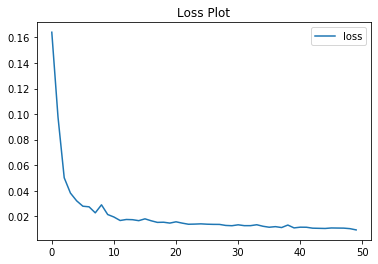

LSTM Model Test MSE: 0.000
LSTM Model Test RMSE: 0.011
plot of predictions and expected results


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


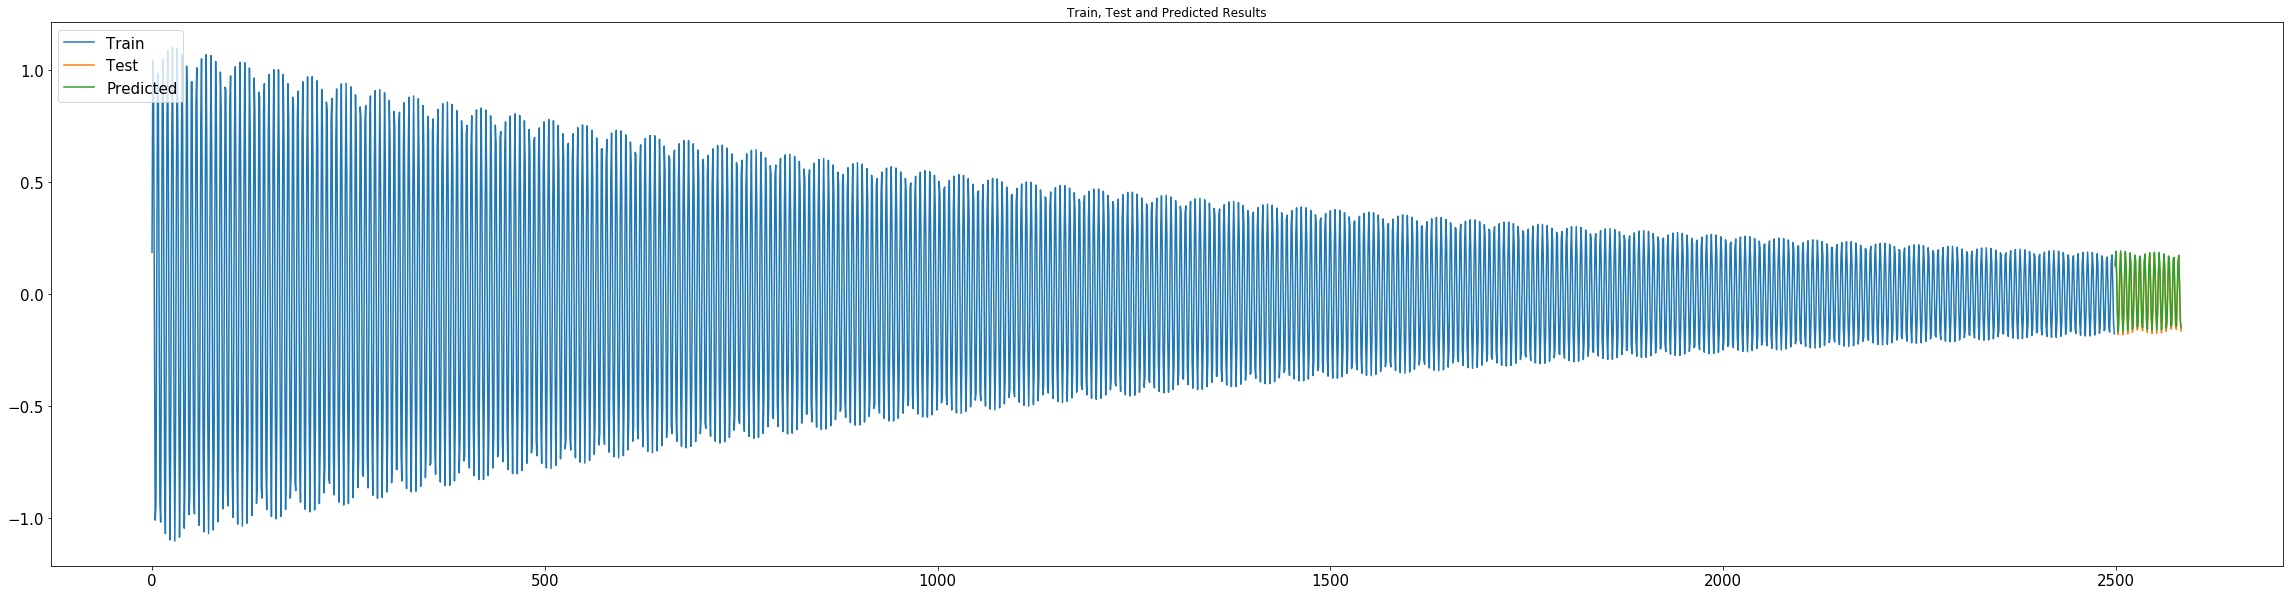

In [20]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, 50, True, 0.01)

FTLFN Model using the first split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
75/75 [==============================] - 0s 1ms/step - loss: 5.7851 - mean_absolute_error: 1.9433
0) TrainMSE=5.783020, TestMSE=0.587836
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
75/75 [==============================] - 0s 2ms/step - loss: 5.7858 - mean_absolute_error: 1.9430
1) TrainMSE=5.783019, TestMSE=0.587915
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
75/75 [==============================] - 0s 1ms/step - loss: 5.7840 - mean_absolute_error: 1.9430
2) TrainMSE=5.782640, TestMSE=0.587771
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
75/75 [==============================] - 0s 1ms/step - loss: 5.7855 - mean_absolute_e

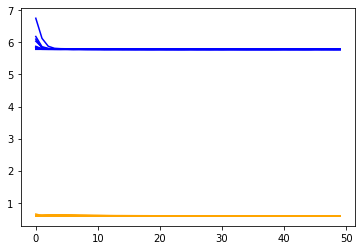

In [21]:
run_ftlfn(X_train_1, y_train_1, X_test_1, y_test_1,10, 50, True, 0.01)

FTLFN Model using the second split:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
79/79 [==============================] - 0s 2ms/step - loss: 0.1702 - mean_absolute_error: 0.3307
0) TrainMSE=0.170111, TestMSE=0.587858
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.1702 - mean_absolute_error: 0.3307
1) TrainMSE=0.170252, TestMSE=0.588290
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
79/79 [==============================] - 0s 1ms/step - loss: 0.1704 - mean_absolute_error: 0.3308
2) TrainMSE=0.170332, TestMSE=0.588389
LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 50  epochs:
79/79 [==============================] - 0s 2ms/step - loss: 0.1703 - mean_absolute_e

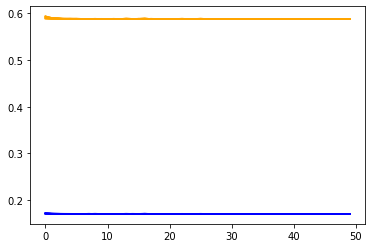

In [22]:
run_ftlfn(X_train_2, y_train_2, X_test_2, y_test_2,10, 50, True, 0.01)